## Try XGboost for the unimputed data

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import gc
gc.collect()

0

In [3]:
df = pd.read_csv('/accounts/grad/huz4/Desktop/STAT222/full_data.csv')

### Preprocessing data

In [4]:
X = df.drop(['taxvaluedollarcnt'], axis =1)
Y = df['taxvaluedollarcnt']

In [5]:
drop_feat = ["finishedsquarefeet13", "finishedsquarefeet15", "finishedfloor1squarefeet", "finishedsquarefeet50",
             "storytypeid", "architecturalstyletypeid", "buildingclasstypeid", "typeconstructiontypeid", "finishedsquarefeet6",
             "pooltypeid10", "pooltypeid7", "hashottuborspa", "fireplaceflag", "threequarterbathnbr", "calculatedbathnbr",
             "fullbathcnt", "numberofstories", "rawcensustractandblock", "censustractandblock",
             "finishedsquarefeet12", "assessmentyear", "roomcnt", "structuretaxvaluedollarcnt","landtaxvaluedollarcnt",
             "propertyzoningdesc", "regionidneighborhood", "regionidzip", "taxdelinquencyyear","taxamount",
             "propertycountylandusecode", "regionidcity", "parcelid", "basementsqft", "yardbuildingsqft26", "latitude", "longitude",
             "taxdelinquencyflag"
            ]

In [6]:
X = X.drop(columns = drop_feat, axis =1)

In [7]:
len(list(X.columns))

22

In [8]:
convert_to_int = ["yearbuilt"] 
convert_to_category= ["airconditioningtypeid", 
                    "heatingorsystemtypeid", 
                    "fips", 
                    "propertylandusetypeid", 
                    "regionidcounty", 
                    "pooltypeid2", 
                    "decktypeid"] 
convert_to_float= ["bathroomcnt", 
                   "bedroomcnt", 
                   "buildingqualitytypeid", 
                   "calculatedfinishedsquarefeet",
                  "fireplacecnt", 
                   "garagecarcnt", 
                   "garagetotalsqft",
                   "dist_to_dtla", 
                   "dist_to_ocean", 
                   "lotsizesquarefeet", 
                   "poolcnt",
                  "poolsizesum", 
                   "unitcnt", 
                   "yardbuildingsqft17"]

In [9]:
for var in convert_to_category: 
    X[var] = X[var].astype('category')

for var in convert_to_float:
    X[var] = X[var].astype("float")
    
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980943 entries, 0 to 2980942
Data columns (total 22 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   airconditioningtypeid         category
 1   bathroomcnt                   float64 
 2   bedroomcnt                    float64 
 3   buildingqualitytypeid         float64 
 4   decktypeid                    category
 5   calculatedfinishedsquarefeet  float64 
 6   fips                          category
 7   fireplacecnt                  float64 
 8   garagecarcnt                  float64 
 9   garagetotalsqft               float64 
 10  heatingorsystemtypeid         category
 11  lotsizesquarefeet             float64 
 12  poolcnt                       float64 
 13  poolsizesum                   float64 
 14  pooltypeid2                   category
 15  propertylandusetypeid         category
 16  regionidcounty                category
 17  unitcnt                       float64 
 18  ya

In [10]:
X['price'] = Y
processed_df = X
processed_df.head(10)

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,decktypeid,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,garagetotalsqft,...,poolsizesum,pooltypeid2,propertylandusetypeid,regionidcounty,unitcnt,yardbuildingsqft17,yearbuilt,dist_to_dtla,dist_to_ocean,price
0,NaN,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,...,NaN,NaN,269.0,3101.0,NaN,NaN,NaN,23.946820,31.192136,9.0
1,NaN,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,...,NaN,NaN,261.0,3101.0,NaN,NaN,NaN,22.292166,32.836755,27516.0
2,NaN,0.0,0.0,NaN,NaN,73026.0,6037.0,NaN,NaN,NaN,...,NaN,NaN,47.0,3101.0,2.0,NaN,1959.0,9.152931,4.340954,1434941.0
3,NaN,0.0,0.0,6.0,NaN,5068.0,6037.0,NaN,NaN,NaN,...,NaN,NaN,47.0,3101.0,NaN,NaN,1948.0,12.661995,43.593469,1174475.0
4,NaN,0.0,0.0,NaN,NaN,1776.0,6037.0,NaN,NaN,NaN,...,NaN,NaN,31.0,3101.0,1.0,NaN,1947.0,12.634968,50.087402,440101.0
5,NaN,0.0,0.0,4.0,NaN,2400.0,6037.0,NaN,NaN,NaN,...,NaN,NaN,31.0,3101.0,NaN,NaN,1943.0,11.263157,46.842204,287634.0
6,NaN,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,...,NaN,NaN,260.0,3101.0,NaN,NaN,NaN,8.094312,48.508329,563029.0
7,NaN,0.0,0.0,NaN,NaN,3611.0,6037.0,NaN,NaN,NaN,...,NaN,NaN,31.0,3101.0,NaN,NaN,1946.0,9.204413,50.612104,698984.0
8,NaN,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,...,NaN,NaN,269.0,3101.0,NaN,NaN,NaN,12.557375,53.161581,9.0
9,NaN,0.0,0.0,4.0,NaN,3754.0,6037.0,NaN,NaN,NaN,...,NaN,NaN,31.0,3101.0,NaN,NaN,1978.0,19.581543,48.384518,265184.0


In [11]:
processed_df.shape

(2980943, 23)

In [12]:
for c, dtype in zip(processed_df.columns, processed_df.dtypes):
    if dtype == np.float64:
        processed_df[c] = processed_df[c].astype(np.float32)

In [13]:
processed_df.dropna(subset=['price'], inplace = True)

In [14]:
sum(processed_df['price'].isna())

0

### Train Test split for processed data

In [16]:
# do a 80,20 split on data, set a seed
import random
random.seed(222)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(processed_df, test_size=0.2)
X_train = train_df.drop(['price'], axis =1)
Y_train = train_df['price']
X_test = test_df.drop(['price'], axis =1)
Y_test = test_df['price']

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2359694, 22)
(2359694,)
(589924, 22)
(589924,)


In [18]:
X_train.dtypes

airconditioningtypeid           category
bathroomcnt                      float32
bedroomcnt                       float32
buildingqualitytypeid            float32
decktypeid                      category
calculatedfinishedsquarefeet     float32
fips                            category
fireplacecnt                     float32
garagecarcnt                     float32
garagetotalsqft                  float32
heatingorsystemtypeid           category
lotsizesquarefeet                float32
poolcnt                          float32
poolsizesum                      float32
pooltypeid2                     category
propertylandusetypeid           category
regionidcounty                  category
unitcnt                          float32
yardbuildingsqft17               float32
yearbuilt                        float32
dist_to_dtla                     float32
dist_to_ocean                    float32
dtype: object

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def get_eval_metrics(models, X, y_true): 
    """
    Calculates MAE (Mean Absoulate Error) and RMSE (Root Mean Squared Error) on the data set for input models. 
    `models`: list of fit models 
    """
    for model in models: 
        y_pred= model.predict(X)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        print(f"Model: {model}")
        print(f"MAE: {mae}, RMSE: {rmse}")

# Test usage of RMSE function
# get_eval_metrics([lin_reg, ridge_reg, lasso_reg], X_prepared_val, y_val)

#calculate average log error 
import math
from statistics import mean
def get_avg_log_error(model, x, y_true):
    """
    Calculate average log error on the data set for imput models
    log error = log(true price) - log(prediction)
    """
    y_pred= model.predict(x)
    avg_log_error = mean( np.log(y_true) - np.log(y_pred))
    print(f"Model: {model}")
    print(f"log_error: {avg_log_error}")

### fit XGboost with unimputed data

In [128]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [129]:
#set validation set for early stopping
train, valid = train_test_split(train_df, test_size=0.2)

X_train = train.drop(['price'], axis =1)
Y_train = train['price']
X_valid = valid.drop(['price'], axis =1)
Y_valid = valid['price']

In [130]:
print(X_train.shape)
print(Y_train.shape)

(1887755, 22)
(1887755,)


In [145]:
# fit xgboost

d_train = xgb.DMatrix(X_train, label=Y_train, enable_categorical=True)
d_valid = xgb.DMatrix(X_valid, label=Y_valid, enable_categorical=True)


print('Training ...')

params = {}
params['eta'] = 0.3
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 9
params['silent'] = 1

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=10, verbose_eval=50)



d_test = xgb.DMatrix(X_test, enable_categorical=True)

print('Done!')

Training ...
[20:50:14] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:50:15] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-mae:319962.07153	valid-mae:320628.57489
[50]	train-mae:172774.31272	valid-mae:182015.58552
[100]	train-mae:166966.91521	valid-mae:180783.19854
[150]	train-mae:163242.25870	valid-mae:180170.23475
[167]	train-mae:161880.31008	valid-mae:180052.99424
Done!


In [152]:
# training set error
get_eval_metrics([clf], d_train, Y_train)

Model: <xgboost.core.Booster object at 0x7f5993bc7430>
MAE: 161812.84375, RMSE: 287877.46875


In [153]:
# training set log error
def replace_negative_with_one(lst):
    return [max(1, num) for num in lst]
d_train = xgb.DMatrix(X_train, enable_categorical=True)
p_train = clf.predict(d_train)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train)
print('mean log error', np.mean(logerror))

mean log error 0.15373242875705392


In [154]:
# testing set error
get_eval_metrics([clf], d_test, Y_test)

Model: <xgboost.core.Booster object at 0x7f5993bc7430>
MAE: 179039.203125, RMSE: 532766.875


In [150]:
# testing set log error
d_test = xgb.DMatrix(X_test, enable_categorical=True)
p_test = clf.predict(d_test)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test)
print('mean log error', np.mean(logerror))

mean log error 0.15364209590195155


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

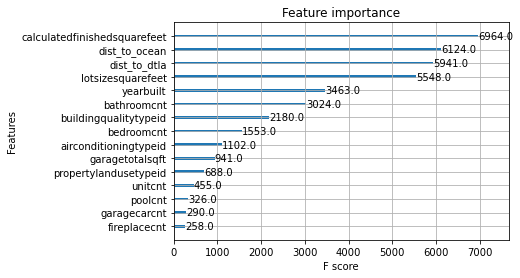

In [151]:
from xgboost import plot_importance
plot_importance(clf, max_num_features = 15)

## lightGBM

In [22]:
import lightgbm as lgb

In [137]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=Y_train)
d_valid = lgb.Dataset(X_valid, label=Y_valid)

params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1

watchlist = [d_valid]
clf_lg = lgb.train(params, d_train, 500, watchlist,early_stopping_rounds=10, verbose_eval=50)


/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.214831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2053
[LightGBM] [Info] Number of data points in the train set: 1887755, number of used features: 22


/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Start training from score 443005.233897
Training until validation scores don't improve for 10 rounds
[50]	valid_0's l1: 202748
[100]	valid_0's l1: 191556
[150]	valid_0's l1: 188269
[200]	valid_0's l1: 187016
[250]	valid_0's l1: 186385
[300]	valid_0's l1: 185860
[350]	valid_0's l1: 185390
[400]	valid_0's l1: 185164
[450]	valid_0's l1: 184917
[500]	valid_0's l1: 184660
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 184660
Predicting on test ...
mean log error 0.1806403047764396
Done!


/tmp/ipykernel_3975493/4107701984.py:24: RuntimeWarning: invalid value encountered in log
  logerror = np.log(p_test) - np.log(Y_test)


In [138]:
# training set error
get_eval_metrics([clf_lg], X_train, Y_train)

Model: <lightgbm.basic.Booster object at 0x7f599790ff10>
MAE: 182663.5814151817, RMSE: 590384.13749887


In [139]:
# training log error
p_train = clf_lg.predict(X_train)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train)
print('mean log error', np.mean(logerror))

mean log error 0.15401763795051962


In [140]:
# testing set error
get_eval_metrics([clf_lg], X_test, Y_test)

Model: <lightgbm.basic.Booster object at 0x7f599790ff10>
MAE: 184478.94691150624, RMSE: 699186.3887487471


In [143]:
# testing log error
p_test = clf_lg.predict(X_test_mul)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test_mul)
print('mean log error', np.mean(logerror))

mean log error 0.2091178792565197


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

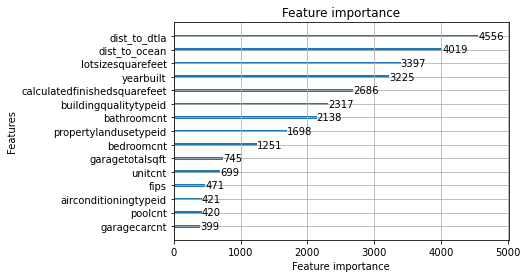

In [144]:
from lightgbm import plot_importance
plot_importance(clf_lg, max_num_features = 15)

# Try models on splitted data set by housing types

In [19]:
## seperate the single house, emptyland and appartment for EDA plots
condominium = processed_df[(processed_df['propertylandusetypeid'] == 266)]

# multi-unit-home includes duplex, triplex, quadruplex
multi_unit_home = processed_df[(processed_df['propertylandusetypeid'] == 246) |
                    (processed_df['propertylandusetypeid'] == 247) |
                    (processed_df['propertylandusetypeid'] == 248)]
                       
single_family = processed_df[processed_df['propertylandusetypeid'] == 261]

# Planned Unit Development (townhouse)
townhouse = processed_df[processed_df['propertylandusetypeid'] == 269]

mobile_home = processed_df[processed_df['propertylandusetypeid'] == 263]

In [20]:
# do a 80,20 split on each data, set a seed
import random
random.seed(222)
from sklearn.model_selection import train_test_split

train_con, test_con = train_test_split(condominium, test_size=0.2)
train_mul, test_mul = train_test_split(multi_unit_home, test_size=0.2)
train_sin, test_sin = train_test_split(single_family, test_size=0.2)
train_town, test_town = train_test_split(townhouse, test_size=0.2)
train_mob, test_mob = train_test_split(mobile_home, test_size=0.2)

In [21]:
#condo
X_train_con = train_con.drop(['price'], axis =1)
Y_train_con = train_con['price']
X_test_con = test_con.drop(['price'], axis =1)
Y_test_con = test_con['price']

#multi_unit
X_train_mul = train_mul.drop(['price'], axis =1)
Y_train_mul = train_mul['price']
X_test_mul = test_mul.drop(['price'], axis =1)
Y_test_mul = test_mul['price']

#single_family
X_train_sin = train_sin.drop(['price'], axis =1)
Y_train_sin = train_sin['price']
X_test_sin = test_sin.drop(['price'], axis =1)
Y_test_sin = test_sin['price']

#townhouse
X_train_town = train_town.drop(['price'], axis =1)
Y_train_town = train_town['price']
X_test_town = test_town.drop(['price'], axis =1)
Y_test_town = test_town['price']

#mobile_home
X_train_mob = train_mob.drop(['price'], axis =1)
Y_train_mob = train_mob['price']
X_test_mob = test_mob.drop(['price'], axis =1)
Y_test_mob = test_mob['price']

In [22]:
print(X_train_con.shape)
print(Y_train_con.shape)
print(X_test_con.shape)
print(Y_test_con.shape)

(386736, 22)
(386736,)
(96684, 22)
(96684,)


### Condo

### xgboost

In [23]:
# do a 80,20 split on data for validation, set a seed
import random
random.seed(222)
from sklearn.model_selection import train_test_split

#set validation set for early stopping
train_con, valid_con = train_test_split(train_con, test_size=0.2)

X_train_con = train_con.drop(['price'], axis =1)
Y_train_con = train_con['price']
X_valid_con = valid_con.drop(['price'], axis =1)
Y_valid_con = valid_con['price']

In [23]:
# fit xgboost

d_train = xgb.DMatrix(X_train_con, label=Y_train_con, enable_categorical=True)
d_valid = xgb.DMatrix(X_valid_con, label=Y_valid_con, enable_categorical=True)


print('Training ...')

params = {}
params['eta'] = 0.3
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 9
params['silent'] = 1

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf_con = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=10, verbose_eval=50)



d_test = xgb.DMatrix(X_test_con, enable_categorical=True)

print('Done!')

Training ...
[15:57:30] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:30] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-mae:258221.32563	valid-mae:258961.65237
[50]	train-mae:88901.94945	valid-mae:96341.56984
[100]	train-mae:84589.58604	valid-mae:95061.37512
[150]	train-mae:81612.75944	valid-mae:94190.35379
[200]	train-mae:79247.05578	valid-mae:93752.12259
[242]	train-mae:77663.95439	valid-mae:93625.76600
Predicting on test ...
mean log error 0.06482356
Done!


/tmp/ipykernel_3974466/2840070794.py:29: RuntimeWarning: invalid value encountered in log
  logerror = np.log(p_test) - np.log(Y_test_con)


In [36]:
# training set error
get_eval_metrics([clf_con], d_train, Y_train_con)

Model: <xgboost.core.Booster object at 0x7f07cf08d150>
MAE: 77634.578125, RMSE: 113657.9765625


In [42]:
# training set log error
def replace_negative_with_one(lst):
    return [max(1, num) for num in lst]
d_train = xgb.DMatrix(X_train_con, enable_categorical=True)
p_train = clf_con.predict(d_train)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_con)
print('mean log error', np.mean(logerror))

mean log error 0.06087870383778639


In [46]:
# testing set error
get_eval_metrics([clf_con], d_test, Y_test_con)

Model: <xgboost.core.Booster object at 0x7f07cf08d150>
MAE: 77634.578125, RMSE: 113657.9765625


In [47]:
d_test = xgb.DMatrix(X_test_con, enable_categorical=True)
p_test = clf_con.predict(d_test)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test_con)
print('mean log error', np.mean(logerror))

mean log error 0.06258476782624285


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

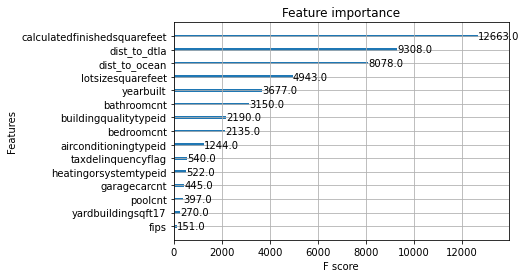

In [48]:
from xgboost import plot_importance
plot_importance(clf_con, max_num_features = 15)

### LightGBM

In [156]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train_con, label=Y_train_con)
d_valid = lgb.Dataset(X_valid_con, label=Y_valid_con)

params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1

watchlist = [d_valid]
clf = lgb.train(params, d_train, 500, watchlist,early_stopping_rounds=10, verbose_eval=50)

print('Done!')

/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1383
[LightGBM] [Info] Number of data points in the train set: 309388, number of used features: 19


/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Start training from score 366672.191164
Training until validation scores don't improve for 10 rounds
[50]	valid_0's l1: 118573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 108643
[150]	valid_0's l1: 105748
[200]	valid_0's l1: 104168
[250]	valid_0's l1: 103296
[300]	valid_0's l1: 102601
[350]	valid_0's l1: 101968
[400]	valid_0's l1: 101407
[450]	valid_0's l1: 100972
[500]	valid_0's l1: 100591
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 100591
Done!


In [157]:
# training set error
get_eval_metrics([clf], X_train_con, Y_train_con)

Model: <lightgbm.basic.Booster object at 0x7f5976996aa0>
MAE: 99428.91054005956, RMSE: 198551.77905453625


In [158]:
# training log error
def replace_negative_with_one(lst):
    return [max(1, num) for num in lst]

p_train = clf.predict(X_train_con)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_con)
print('mean log error', np.mean(logerror))

mean log error 0.08082968102020845


In [159]:
# testing set error
get_eval_metrics([clf], X_test_con, Y_test_con)

Model: <lightgbm.basic.Booster object at 0x7f5976996aa0>
MAE: 99871.84827326746, RMSE: 186777.76614773629


In [160]:
# training log error
def replace_negative_with_one(lst):
    return [max(1, num) for num in lst]

p_test = clf.predict(X_test_con)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test_con)
print('mean log error', np.mean(logerror))

mean log error 0.08083404434979805


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

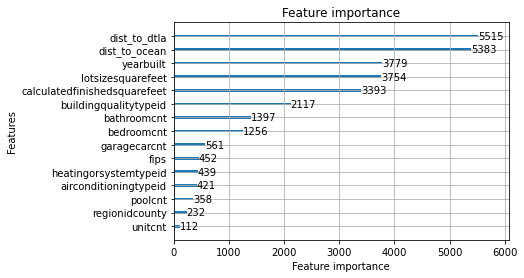

In [161]:
from lightgbm import plot_importance
plot_importance(clf, max_num_features = 15)

## multi unit home

### xgboost

In [162]:
train_mul, valid_mul = train_test_split(train_mul, test_size=0.2)
#set validation set for early stopping

X_train_mul = train_mul.drop(['price'], axis =1)
Y_train_mul = train_mul['price']
X_valid_mul = valid_mul.drop(['price'], axis =1)
Y_valid_mul = valid_mul['price']

In [163]:
d_train_mul = xgb.DMatrix(X_train_mul, label=Y_train_mul, enable_categorical=True)
d_valid_mul = xgb.DMatrix(X_valid_mul, label=Y_valid_mul, enable_categorical=True)


print('Training ...')

params = {}
params['eta'] = 0.03
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4
params['silent'] = 1

watchlist = [(d_train_mul, 'train'), (d_valid_mul, 'valid')]
clf_mul = xgb.train(params, d_train_mul, 10000, watchlist, early_stopping_rounds=10, verbose_eval=50)



d_test_mul = xgb.DMatrix(X_test_mul, enable_categorical=True)


print('Done!')

Training ...
[21:10:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:09] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-mae:385885.69724	valid-mae:389011.43033
[50]	train-mae:195761.16826	valid-mae:198637.69987
[87]	train-mae:191463.34733	valid-mae:194587.38406
Done!


In [164]:
# training set error
get_eval_metrics([clf_mul], d_train_mul, Y_train_mul)

Model: <xgboost.core.Booster object at 0x7f599813bdf0>
MAE: 191463.359375, RMSE: 317942.21875


In [165]:
# training set log error
def replace_negative_with_one(lst):
    return [max(1, num) for num in lst]
d_train = xgb.DMatrix(X_train_mul, enable_categorical=True)
p_train = clf_mul.predict(d_train)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_mul)
print('mean log error', np.mean(logerror))

mean log error 0.18774763


In [166]:
# testing set error
get_eval_metrics([clf_mul], d_test_mul, Y_test_mul)

Model: <xgboost.core.Booster object at 0x7f599813bdf0>
MAE: 191020.53125, RMSE: 311625.625


In [167]:
# testing set log error

d_test = xgb.DMatrix(X_test_mul, enable_categorical=True)
p_test = clf_mul.predict(d_test)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test_mul)
print('mean log error', np.mean(logerror))

mean log error 0.19889733


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

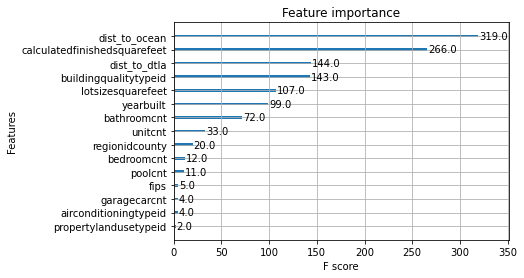

In [168]:
from xgboost import plot_importance
plot_importance(clf_mul, max_num_features = 15)

### lightgbm

In [169]:
d_train = lgb.Dataset(X_train_mul, label=Y_train_mul)
d_valid = lgb.Dataset(X_valid_mul, label=Y_valid_mul)

params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1

watchlist = [d_valid]
clf_mul = lgb.train(params, d_train, 500, watchlist,early_stopping_rounds=10, verbose_eval=50)

print('Done!')

/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 99777, number of used features: 18
[LightGBM] [Info] Start training from score 397800.958347
Training until validation scores don't improve for 10 rounds


/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l1: 198373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 194188
[150]	valid_0's l1: 193158
[200]	valid_0's l1: 192746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	valid_0's l1: 192436
[300]	valid_0's l1: 192235
[350]	valid_0's l1: 192054
[400]	valid_0's l1: 191943
[450]	valid_0's l1: 191769
[500]	valid_0's l1: 191650
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 191650
Done!


In [170]:
# training set error
get_eval_metrics([clf_mul], X_train_mul, Y_train_mul)

Model: <lightgbm.basic.Booster object at 0x7f5993ee6dd0>
MAE: 186076.3266536964, RMSE: 306730.55262324476


In [171]:
# training log error
p_train = clf_mul.predict(X_train_mul)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_mul)
print('mean log error', np.mean(logerror))

mean log error 0.22665112272171542


In [172]:
# testing set error
get_eval_metrics([clf_mul], X_test_mul, Y_test_mul)

Model: <lightgbm.basic.Booster object at 0x7f5993ee6dd0>
MAE: 190575.9627033211, RMSE: 302244.78811089776


In [173]:
# testing log error
def replace_negative_with_one(lst):
    return [max(1, num) for num in lst]

p_test = clf_mul.predict(X_test_mul)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test_mul)
print('mean log error', np.mean(logerror))

mean log error 0.23831958157278746


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

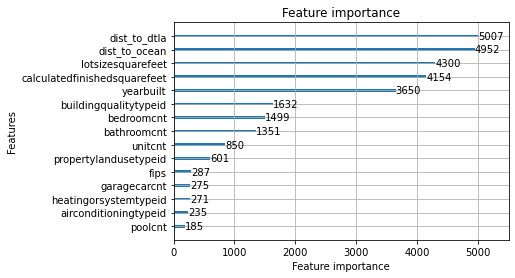

In [174]:
from lightgbm import plot_importance
plot_importance(clf_mul, max_num_features = 15)

## Single Family

### xgboost

In [114]:
train_sin, valid_sin = train_test_split(train_sin, test_size=0.2)
#set validation set for early stopping

X_train_sin = train_sin.drop(['price'], axis =1)
Y_train_sin = train_sin['price']
X_valid_sin = valid_sin.drop(['price'], axis =1)
Y_valid_sin = valid_sin['price']

In [115]:
d_train_sin = xgb.DMatrix(X_train_sin, label=Y_train_sin, enable_categorical=True)
d_valid_sin = xgb.DMatrix(X_valid_sin, label=Y_valid_sin, enable_categorical=True)


print('Training ...')

params = {}
params['eta'] = 0.03
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4
params['silent'] = 1

watchlist = [(d_train_sin, 'train'), (d_valid_sin, 'valid')]
clf_sin = xgb.train(params, d_train_sin, 10000, watchlist, early_stopping_rounds=10, verbose_eval=50)



d_test_sin = xgb.DMatrix(X_test_sin, enable_categorical=True)


print('Done!')

Training ...
[17:26:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:48] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-mae:447719.87910	valid-mae:446707.13715
[50]	train-mae:216204.42006	valid-mae:216568.21208
[100]	train-mae:208575.76600	valid-mae:209275.05426
[150]	train-mae:206875.53266	valid-mae:207899.12762
[200]	train-mae:204371.13023	valid-mae:205620.81567
[250]	train-mae:202444.67529	valid-mae:203895.91318
[300]	train-mae:200809.62274	valid-mae:202435.51235
[350]	train-mae:199572.00791	valid-mae:201334.08534
[400]	train-mae:198831.13388	valid-mae:200733.44122
[450]	train-mae:198311.94155	valid-mae:200332.61297
[500]	train-mae:197802.63105	valid-mae:199927.83564
[550]	train-mae:197382.00860	valid-mae:199603.61351
[600]	train-mae:196891.60075	valid-mae:199208.03466
[650]	train-mae:196521.91491	valid-mae:198953.22416
[700]	train-mae:196202.79007	valid-mae:198724.81194
[750]	t

In [116]:
# training set error
get_eval_metrics([clf_sin], d_train_sin, Y_train_sin)

Model: <xgboost.core.Booster object at 0x7f599923dc30>
MAE: 193637.203125, RMSE: 395246.09375


In [117]:
# training set log error

d_train = xgb.DMatrix(X_train_sin, enable_categorical=True)
p_train = clf_sin.predict(d_train)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_sin)
print('mean log error', np.mean(logerror))

mean log error 0.1856494510254671


In [118]:
# testing set error
get_eval_metrics([clf_sin], d_test_sin, Y_test_sin)

Model: <xgboost.core.Booster object at 0x7f599923dc30>
MAE: 197485.359375, RMSE: 450473.8125


In [120]:
# testing set log error

d_test = xgb.DMatrix(X_test_sin, enable_categorical=True)
p_test = clf_sin.predict(d_test)
p_test = replace_negative_with_one(p_test)

logerror = np.log(p_test) - np.log(Y_test_sin)
print('mean log error', np.mean(logerror))

mean log error 0.18504443543782714


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

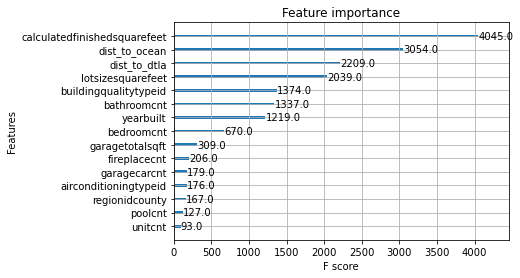

In [121]:
from xgboost import plot_importance
plot_importance(clf_sin, max_num_features = 15)

### lightgbm

In [122]:
d_train = lgb.Dataset(X_train_sin, label=Y_train_sin)
d_valid = lgb.Dataset(X_valid_sin, label=Y_valid_sin)

params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1

watchlist = [d_valid]
clf_sin = lgb.train(params, d_train, 500, watchlist,early_stopping_rounds=10, verbose_eval=50)

print('Done!')

/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 1101550, number of used features: 21


/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Start training from score 461537.191999
Training until validation scores don't improve for 10 rounds
[50]	valid_0's l1: 212233
[100]	valid_0's l1: 201399
[150]	valid_0's l1: 198467
[200]	valid_0's l1: 197540
[250]	valid_0's l1: 196992
[300]	valid_0's l1: 196568
[350]	valid_0's l1: 196224
[400]	valid_0's l1: 195892
[450]	valid_0's l1: 195569
[500]	valid_0's l1: 195297
Did not meet early stopping. Best iteration is:
[499]	valid_0's l1: 195296
Done!


In [123]:
# training set error
get_eval_metrics([clf_sin], X_train_sin, Y_train_sin)

Model: <lightgbm.basic.Booster object at 0x7f5994987f40>
MAE: 193218.81208419148, RMSE: 450292.0872594605


In [124]:
# training log error
def replace_negative_with_one(lst):
    return [max(1, num) for num in lst]

p_train = clf_sin.predict(X_train_sin)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_sin)
print('mean log error', np.mean(logerror))

mean log error 0.18062942102857507


In [125]:
# testing set error
get_eval_metrics([clf_sin], X_test_sin, Y_test_sin)

Model: <lightgbm.basic.Booster object at 0x7f5994987f40>
MAE: 195330.34093713877, RMSE: 451593.39241966885


In [126]:
# testing log error
def replace_negative_with_one(lst):
    return [max(1, num) for num in lst]

p_test = clf_mul.predict(X_test_sin)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test_sin)
print('mean log error', np.mean(logerror))

mean log error 0.5086490750823917


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

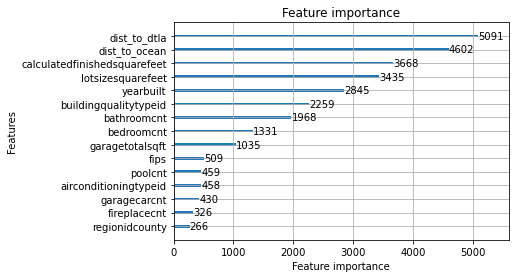

In [127]:
from lightgbm import plot_importance
plot_importance(clf_sin, max_num_features = 15)

## Town house

### xgboost

In [176]:
train_town, valid_town = train_test_split(train_town, test_size=0.2)
#set validation set for early stopping

X_train_town = train_town.drop(['price'], axis =1)
Y_train_town = train_town['price']
X_valid_town = valid_town.drop(['price'], axis =1)
Y_valid_town = valid_town['price']

In [177]:
d_train_town = xgb.DMatrix(X_train_town, label=Y_train_town, enable_categorical=True)
d_valid_town = xgb.DMatrix(X_valid_town, label=Y_valid_town, enable_categorical=True)


print('Training ...')

params = {}
params['eta'] = 0.03
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4
params['silent'] = 1

watchlist = [(d_train_town, 'train'), (d_valid_town, 'valid')]
clf_town = xgb.train(params, d_train_town, 10000, watchlist, early_stopping_rounds=10, verbose_eval=50)



d_test_town = xgb.DMatrix(X_test_town, enable_categorical=True)


print('Done!')

Training ...
[21:12:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:21] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-mae:478238.22727	valid-mae:478469.26532
[50]	train-mae:158433.56928	valid-mae:162980.87989
[100]	train-mae:132218.14010	valid-mae:138390.65864
[150]	train-mae:127184.14988	valid-mae:134266.61166
[200]	train-mae:123721.77403	valid-mae:131570.84457
[250]	train-mae:121144.65016	valid-mae:129695.05677
[300]	train-mae:119955.62759	valid-mae:128999.09343
[350]	train-mae:118908.02715	valid-mae:128290.82144
[400]	train-mae:118132.25230	valid-mae:127749.87627
[450]	train-mae:117434.59499	valid-mae:127294.61809
[500]	train-mae:116756.49649	valid-mae:126885.55187
[550]	train-mae:116072.71579	valid-mae:126490.47019
[600]	train-mae:115555.85219	valid-mae:126172.07281
[650]	train-mae:114973.93325	valid-mae:125881.07413
[700]	train-mae:114447.21781	valid-mae:125589.43861
[750]	t

In [178]:
# training set error
get_eval_metrics([clf_town], d_train_town, Y_train_town)

Model: <xgboost.core.Booster object at 0x7f5994928f10>
MAE: 110357.875, RMSE: 158572.828125


In [179]:
# training set log error

d_train = xgb.DMatrix(X_train_town, enable_categorical=True)
p_train = clf_town.predict(d_train)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_town)
print('mean log error', np.mean(logerror))

mean log error 0.18664583684154748


In [180]:
# testing set error
get_eval_metrics([clf_town], d_test_town, Y_test_town)

Model: <xgboost.core.Booster object at 0x7f5994928f10>
MAE: 119774.8515625, RMSE: 245363.84375


In [181]:
# testing set log error

d_test = xgb.DMatrix(X_test_town, enable_categorical=True)
p_test = clf_town.predict(d_test)
p_test = replace_negative_with_one(p_test)

logerror = np.log(p_test) - np.log(Y_test_town)
print('mean log error', np.mean(logerror))

mean log error 0.17782120959715805


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

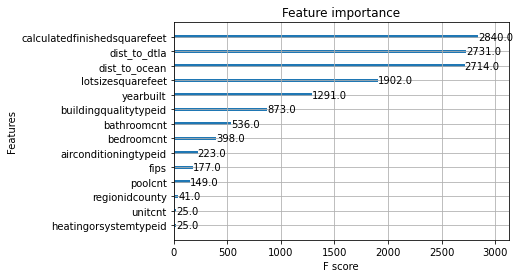

In [182]:
from xgboost import plot_importance
plot_importance(clf_town, max_num_features = 15)

### lightgbm

In [183]:
d_train = lgb.Dataset(X_train_town, label=Y_train_town)
d_valid = lgb.Dataset(X_valid_town, label=Y_valid_town)

params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1

watchlist = [d_valid]
clf_town = lgb.train(params, d_train, 500, watchlist,early_stopping_rounds=10, verbose_eval=50)

print('Done!')

/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/accounts/grad/huz4/.local/lib/python3.10/site-pack

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 31501, number of used features: 14
[LightGBM] [Info] Start training from score 492676.910796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [184]:
# training set error
get_eval_metrics([clf_town], X_train_town, Y_train_town)

Model: <lightgbm.basic.Booster object at 0x7f5994ba5600>
MAE: 119311.23305618277, RMSE: 261499.39920471507


In [185]:
# training log error
p_train = clf_town.predict(X_train_town)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_town)
print('mean log error', np.mean(logerror))

mean log error 0.20656845706021937


In [186]:
# testing set error
get_eval_metrics([clf_town], X_test_town, Y_test_town)

Model: <lightgbm.basic.Booster object at 0x7f5994ba5600>
MAE: 121519.20639091653, RMSE: 188367.63307351354


In [187]:
# testing log error

p_test = clf_town.predict(X_test_town)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test_town)
print('mean log error', np.mean(logerror))

mean log error 0.19122900368683035


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

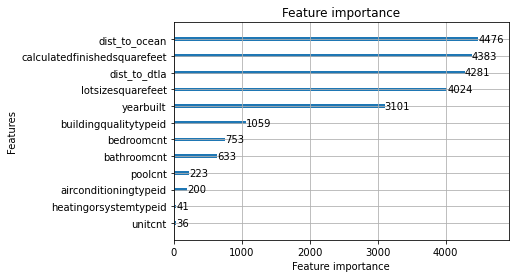

In [188]:
from lightgbm import plot_importance
plot_importance(clf_town, max_num_features = 15)

## Mobile Home

### xgboost

In [189]:
train_mob, valid_mob = train_test_split(train_mob, test_size=0.2)
#set validation set for early stopping

X_train_mob = train_mob.drop(['price'], axis =1)
Y_train_mob= train_mob['price']
X_valid_mob = valid_mob.drop(['price'], axis =1)
Y_valid_mob = valid_mob['price']

In [190]:
d_train_mob = xgb.DMatrix(X_train_mob, label=Y_train_mob, enable_categorical=True)
d_valid_mob = xgb.DMatrix(X_valid_mob, label=Y_valid_mob, enable_categorical=True)


print('Training ...')

params = {}
params['eta'] = 0.03
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4
params['silent'] = 1

watchlist = [(d_train_mob, 'train'), (d_valid_mob, 'valid')]
clf_mob = xgb.train(params, d_train_mob, 10000, watchlist, early_stopping_rounds=10, verbose_eval=50)



d_test_mob = xgb.DMatrix(X_test_mob, enable_categorical=True)


print('Done!')

Training ...
[21:13:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:32] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-mae:42633.79660	valid-mae:39759.86007
[50]	train-mae:23205.87102	valid-mae:21686.33058
[68]	train-mae:22801.37102	valid-mae:21635.68640
Done!


In [191]:
# training set error
get_eval_metrics([clf_mob], d_train_mob, Y_train_mob)

Model: <xgboost.core.Booster object at 0x7f5994a0fc70>
MAE: 22801.37109375, RMSE: 55684.890625


In [194]:
# training set log error

d_train = xgb.DMatrix(X_train_mob, enable_categorical=True)
p_train = clf_mob.predict(d_train)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_mob)
print('mean log error', np.mean(logerror))

mean log error 0.26760718


In [195]:
# testing set error
get_eval_metrics([clf_mob], d_test_mob, Y_test_mob)

Model: <xgboost.core.Booster object at 0x7f5994a0fc70>
MAE: 22409.224609375, RMSE: 50282.3515625


In [197]:
# testing set log error

d_test = xgb.DMatrix(X_test_mob, enable_categorical=True)
p_test = clf_mob.predict(d_test)
p_test = replace_negative_with_one(p_test)

logerror = np.log(p_test) - np.log(Y_test_mob)
print('mean log error', np.mean(logerror))

mean log error 0.28762963


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

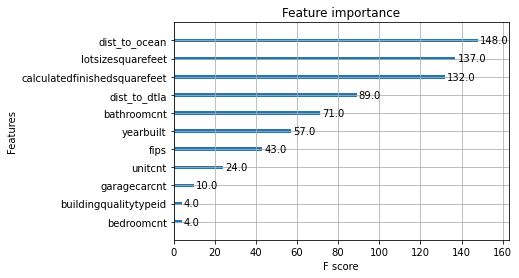

In [198]:
from xgboost import plot_importance
plot_importance(clf_mob, max_num_features = 15)

### lightgbm

In [199]:
d_train = lgb.Dataset(X_train_mob, label=Y_train_mob)
d_valid = lgb.Dataset(X_valid_mob, label=Y_valid_mob)

params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1

watchlist = [d_valid]
clf_mob = lgb.train(params, d_train, 500, watchlist,early_stopping_rounds=10, verbose_eval=50)

print('Done!')

/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/accounts/grad/huz4/.local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/accounts/grad/huz4/.local/lib/python3.10/site-pack

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1113
[LightGBM] [Info] Number of data points in the train set: 14769, number of used features: 11
[LightGBM] [Info] Start training from score 43941.562597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [200]:
# training set error
get_eval_metrics([clf_mob], X_train_mob, Y_train_mob)

Model: <lightgbm.basic.Booster object at 0x7f5993786e30>
MAE: 23269.330300840003, RMSE: 71871.26855672742


In [201]:
# training log error
p_train = clf_mob.predict(X_train_mob)
p_train = replace_negative_with_one(p_train)
import math
logerror = np.log(p_train) - np.log(Y_train_mob)
print('mean log error', np.mean(logerror))

mean log error 0.3414510335468794


In [202]:
# testing set error
get_eval_metrics([clf_mob], X_test_mob, Y_test_mob)

Model: <lightgbm.basic.Booster object at 0x7f5993786e30>
MAE: 22074.87081109835, RMSE: 45081.71992120734


In [205]:
# testing log error

p_test = clf_mob.predict(X_test_mob)
p_test = replace_negative_with_one(p_test)
import math
logerror = np.log(p_test) - np.log(Y_test_mob)
print('mean log error', np.mean(logerror))

mean log error 0.3507018692892704


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

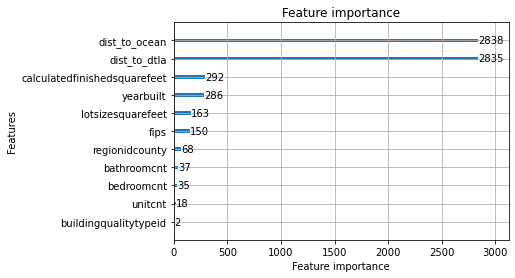

In [204]:
from lightgbm import plot_importance
plot_importance(clf_mob, max_num_features = 15)